<h1> Classification Analysis on Textual Data </h1>


<h3> 
This file contains code for histogram, data preprocessing and most significant terms.<br>
Code By:<br>
   Konark J S Kumar - 204759469<br>
   Shreyas Lakhe - 105026650
</h3>

Listing all package import statements

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

Some utility functions that are going to be used in the program

In [2]:
def preprocess_data(data):
	letters_only = re.sub("[^a-zA-Z]", " ", data)
	lower_case = letters_only.lower()
	words = lower_case.split()

	words = [w for w in words if not w in stopwords.words('english')]
	ps = PorterStemmer()
	words = [ps.stem(w) for w in words]
	return(" ".join( words ))

We now find the 10 most significant terms/words in each class with respect to TFxICF measure.

In [11]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

category2 = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']

class_data_list = []

for cat in category2:
    category = [cat]
    class_data = fetch_20newsgroups(subset='train', categories=category, random_state=42)
    data_string = ""
    for data in class_data.data:
        data_string = data_string + " " + preprocess_data(data)
    class_data_list.append(data_string)

    
tfidfVec = TfidfVectorizer(min_df=2)
X_train_data = tfidfVec.fit_transform(class_data_list)



In [12]:
for i in range(len(category2)):
    
    cat = category2[i]
    top_ten_terms = []
    
    row = X_train_data.getrow(i).toarray()[0].ravel()
    top_ten_indicies = row.argsort()[-10:]
    top_ten_values = row[top_ten_indicies]    
    
    for i in top_ten_indicies:
        top_ten_terms.append(tfidfVec.get_feature_names()[i])

    print(cat, top_ten_terms)
        

('comp.sys.ibm.pc.hardware', [u'system', u'card', u'organ', u'subject', u'line', u'use', u'com', u'scsi', u'edu', u'drive'])
('comp.sys.mac.hardware', [u'drive', u'problem', u'post', u'appl', u'use', u'organ', u'subject', u'mac', u'line', u'edu'])
('misc.forsale', [u'use', u'univers', u'new', u'post', u'com', u'sale', u'organ', u'subject', u'line', u'edu'])
('soc.religion.christian', [u'line', u'peopl', u'subject', u'church', u'jesu', u'would', u'one', u'edu', u'christian', u'god'])


<b>In the next part of the project we will work with just 8 classes </b>

In [15]:
classes = ['comp.graphics',
           'comp.os.ms-windows.misc',
           'comp.sys.ibm.pc.hardware',
           'comp.sys.mac.hardware',
           'rec.autos',
           'rec.motorcycles',
           'rec.sport.baseball',
           'rec.sport.hockey']

In [16]:
training_data = fetch_20newsgroups(subset = 'train', categories = classes, shuffle = True, random_state = 42)

<b>To the data of the 8 classes we plot a histogram of the number of training documents per class to check if they are evenly distributed.</b>

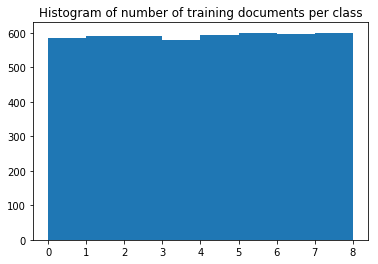

In [17]:
target_classes = training_data.target
plt.hist(target_classes, bins=np.arange(target_classes.min(), target_classes.max()+2))
plt.title("Histogram of number of training documents per class")
plt.show()

Preprocess data and do TFIDF


In [18]:
preprocessed_train_data = []

for data in training_data.data:
    preprocessed_train_data.append(preprocess_data(data))

In [19]:
TFIDFVec2 = TfidfVectorizer(min_df=2)
train_data_mat2 = TFIDFVec2.fit_transform(preprocessed_train_data)

In [20]:
print("Number of terms for min_df=2: " + str(len(TFIDFVec2.vocabulary_)))

Number of terms for min_df=2: 19406


In [27]:
train_data_mat2.shape

(4732, 19406)

In [23]:
TFIDFVec5 = TfidfVectorizer(min_df=5)
train_data_mat5 = TFIDFVec5.fit_transform(preprocessed_train_data)

In [24]:
print("Number of terms for min_df=5" + str(len(TFIDFVec5.vocabulary_)))

Number of terms for min_df=59058


In [34]:
train_data_mat5.shape

(4732, 9058)

In [36]:
model = NMF(n_components=50, init='random', random_state=0)
W_train = model.fit_transform(train_data_mat5)
print W_train.shape

(4732, 50)
